In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
data = pd.read_csv('bank_data_marketing.csv')

In [5]:
data

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,Campaign-2,999-Days,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,Campaign-4,999-Days,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191
2,25,services,married,high.school,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,Campaign-3,999-Days,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,Campaign-1,999-Days,0,nonexistent,-0.1,93.2,-42.0,no,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,Campaign-1,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.959,5228.1
4116,27,student,single,high.school,no,no,no,Campaign-2,999-Days,1,failure,-1.8,92.893,-46.2,no,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.966,5228.1


In [6]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4117 non-null   object 
 2   marital         4118 non-null   object 
 3   education       4118 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   campaign        4116 non-null   object 
 8   pdays           4119 non-null   object 
 9   previous        4119 non-null   object 
 10  poutcome        4117 non-null   object 
 11  emp.var.rate    4119 non-null   float64
 12  cons.price.idx  4119 non-null   object 
 13  cons.conf.idx   4119 non-null   float64
 14  pred_subs       4118 non-null   object 
 15  euribor3m       4119 non-null   object 
 16  nr.employed     4117 non-null   object 
dtypes: float64(2), int64(1), object(1

In [8]:
data.isnull().sum()

age               0
job               2
marital           1
education         1
default           0
housing           0
loan              0
campaign          3
pdays             0
previous          0
poutcome          2
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
pred_subs         1
euribor3m         0
nr.employed       2
dtype: int64

In [9]:
data.dropna(axis = 0, inplace = True)

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'pred_subs', 'euribor3m',
       'nr.employed'],
      dtype='object')

In [11]:
data['age'].unique()

array([30, 39, 25, 38, 47, 32, 41, 35, 36, 29, 27, 44, 46, 50, 55, 40, 28,
       34, 33, 51, 48, 31, 20, 76, 45, 56, 24, 58, 60, 37, 52, 42, 49, 54,
       59, 57, 43, 53, 75, 82, 71, 21, 22, 23, 26, 81, 61, 67, 73, 18, 64,
       74, 77, 86, 85, 63, 88, 78, 72, 68, 80, 66, 19, 62, 65, 69, 70],
      dtype=int64)

In [12]:
data['job'].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

In [13]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [85]:
data['education'].unique()

array(['basic.9y', 'high.school', 'university.degree', 'basic.4y',
       'professional.course', 'basic.6y', 'unknown', 'illiterate'],
      dtype=object)

In [15]:
data[data['education']=='23%']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
356,27,services,married,23%,no,no,no,Campaign-3,999-Days,0,nonexistent,1.4,93.918,-42.7,no,4.963,5228.1


In [16]:
data.drop([58], axis = 0, inplace = True)
data.drop([356], axis = 0, inplace = True)

In [17]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [18]:
a = data[data['default'] == 'unknown'].index

In [19]:
data.drop(a, axis = 0, inplace = True)

In [20]:
data[data['default'] == 'unknown']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed


In [21]:
data['housing'].unique()

array(['yes', 'no', 'unknown', '$', 'Appolo'], dtype=object)

In [22]:
data[data['housing'] == 'Appolo']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1688,34,technician,single,professional.course,no,Appolo,yes,Campaign-1,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.97,5228.1


In [23]:
data.drop(data[data['housing'] == 'Appolo'].index, axis = 0, inplace = True)

In [24]:
data['loan'].unique()

array(['no', 'unknown', 'yes', '$', '&'], dtype=object)

In [25]:
data[data['loan'] == '&' ]

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
672,59,retired,married,university.degree,no,yes,&,Campaign-18,999-Days,0,nonexistent,1.4,93.444,-36.1,no,4.962,5228.1


In [26]:
data.drop(data[data['loan'] == '$'].index, axis = 0, inplace = True)

In [27]:
data.drop([672], axis = 0, inplace = True)

In [28]:
data['campaign'].unique()

array(['Campaign-2', 'Campaign-4', 'Campaign-1', 'Campaign-3',
       'Campaign-6', 'Campaign-7', 'Campaign-27', 'Campaign-5',
       'Campaign-12', 'Campaign-14', 'Campaign-10', 'Campaign-13',
       'Campaign-8', 'Campaign-9', 'Campaign-11', 'Campaign-17',
       'Campaign-22', 'Campaign-15', 'Campaign-16', 'Campaign-19',
       'Campaign-23', 'Campaign-24', 'Campaign-35', 'Campaign-29'],
      dtype=object)

In [29]:
def campaign(a):
    return int(a.split('-')[1])

In [30]:
data['campaign'] = data['campaign'].apply(lambda a: campaign(a))

In [86]:
data['campaign'].unique()

array([ 2,  4,  1,  3,  6,  7, 27,  5, 12, 14, 10, 13,  8,  9, 11, 17, 22,
       15, 16, 19, 23, 24, 35, 29], dtype=int64)

In [31]:
data['pdays'].unique()

array(['999-Days', '12-Days', '3-Days', '6-Days', '5-Days', '2-Days',
       '@-Days', '10-Days', '11-Days', '7-Days', '1-Days', '18-Days',
       '4-Days', '15-Days', '0-Days', 'Bank No responce-Days', '16-Days',
       '9-Days', '19-Days', '17-Days', '13-Days', '21-Days'], dtype=object)

In [32]:
data[data['pdays'] == 'Bank No responce-Days']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1546,46,admin.,divorced,high.school,no,yes,no,1,Bank No responce-Days,0,nonexistent,-0.1,93.798,-40.4,no,5.045,5195.8


In [33]:
data.drop([116], axis = 0, inplace = True)
data.drop([1546], axis = 0, inplace = True)


In [34]:
def pdays(b):
    return int(b.split('-')[0])

In [35]:
data['pdays'] = data['pdays'].apply(lambda b: pdays(b))

In [87]:
data['pdays'].dtype

dtype('int64')

In [88]:
data['previous'].unique()

array(['0', '2', '1', '3', '5', '4', '6'], dtype=object)

In [37]:
data[data['previous'] == '\\']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1126,34,blue-collar,married,basic.4y,no,yes,no,1,999,\,nonexistent,1.4,93.918,-42.7,no,4.958,5228.1


In [38]:
data.drop([1126], axis = 0, inplace = True)

In [90]:
data['previous']= data['previous'].astype(int)

In [39]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success', '*', '||', 'Q998'],
      dtype=object)

In [40]:
data[data['poutcome'] == 'Q998']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
994,35,self-employed,single,university.degree,no,no,yes,1,3,1,Q998,-0.1,93.2,-42.0,no,4.12,5195.8


In [41]:
data.drop([311], axis= 0, inplace = True)

In [42]:
data.drop([213], axis= 0, inplace = True)
data.drop([994], axis= 0, inplace = True)

In [43]:
data['emp.var.rate'].unique()

array([-1.8,  1.1,  1.4, -0.1, -1.1, -2.9, -1.7, -3.4, -3. , -0.2])

In [60]:
data['cons.price.idx'].unique()

array(['92.893', '93.994', '94.465', '93.2', '94.199', '93.918', '93.369',
       '93.444', '92.843', '92.963', '94.601', '94.027', '92.379',
       '92.431', '93.749', '93.075', '94.055', '92.469', '94.767',
       '92.201', '92.649', '94.215', '93.876', '93.798', '92.713',
       '92.756'], dtype=object)

In [92]:
data['cons.price.idx'] = data['cons.price.idx'].astype(float)

In [58]:
data[data['cons.price.idx'] == 'xccui']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1911,47,technician,single,professional.course,no,yes,no,2,999,0,nonexistent,1.4,xccui,-42.7,no,4.962,5228.1


In [59]:
data.drop([260], axis = 0, inplace = True)
data.drop([338], axis = 0, inplace = True)
data.drop([509], axis = 0, inplace = True)
data.drop([1911], axis = 0, inplace = True)

In [95]:
data['cons.price.idx'].dtype

dtype('float64')

In [63]:
data['cons.conf.idx'].unique()

array([-46.2, -36.4, -41.8, -42. , -37.5, -42.7, -34.8, -36.1, -50. ,
       -40.8, -49.5, -38.3, -29.8, -26.9, -34.6, -47.1, -39.8, -33.6,
       -50.8, -31.4, -30.1, -40.3, -40. , -40.4, -33. , -45.9])

In [96]:
data['cons.conf.idx'].dtype

dtype('float64')

In [64]:
data['pred_subs'].unique()

array(['no', 'yes'], dtype=object)

In [65]:
data['pred_subs'].value_counts()

no     2896
yes     400
Name: pred_subs, dtype: int64

In [75]:
data['euribor3m'].unique()

array([1.313, 4.855, 4.962, 4.959, 4.191, 0.884, 0.879, 4.968, 4.859,
       4.958, 4.963, 4.957, 4.961, 0.639, 4.967, 4.965, 4.856, 1.687,
       1.268, 4.864, 4.12 , 1.334, 0.977, 0.899, 4.592, 1.299, 4.97 ,
       1.26 , 1.327, 4.966, 0.77 , 4.866, 4.964, 0.886, 0.739, 0.654,
       1.405, 1.281, 4.96 , 0.754, 4.865, 1.291, 1.365, 4.076, 4.857,
       4.153, 1.266, 1.41 , 4.858, 0.702, 1.029, 1.085, 1.344, 1.25 ,
       1.392, 1.262, 1.05 , 0.851, 0.716, 0.877, 0.835, 1.048, 1.028,
       0.637, 1.244, 1.354, 4.021, 1.453, 0.715, 1.778, 0.773, 1.035,
       0.9  , 0.898, 0.742, 0.861, 4.86 , 1.264, 0.704, 1.27 , 0.695,
       1.039, 1.531, 0.883, 0.748, 0.809, 4.794, 1.479, 0.697, 0.959,
       1.032, 0.896, 0.827, 1.483, 0.905, 1.466, 0.714, 0.644, 0.849,
       0.881, 0.834, 0.645, 0.659, 0.885, 1.041, 0.904, 0.942, 0.737,
       4.947, 0.722, 1.049, 1.415, 0.797, 0.699, 0.81 , 0.71 , 0.707,
       0.646, 1.043, 0.668, 1.435, 0.72 , 0.767, 0.982, 1.602, 1.259,
       1.811, 4.955,

In [74]:
data['euribor3m'] = data['euribor3m'].astype(float)

In [71]:
data[data['euribor3m'] == 'hgz']

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
1908,37,technician,single,high.school,no,no,no,3,999,0,nonexistent,1.4,94.465,-41.8,no,hgz,5228.1


In [72]:
data.drop([1908],axis = 0, inplace = True)

In [79]:
data['euribor3m'].dtype

dtype('float64')

In [83]:
data['nr.employed'].unique()

array([5099.1, 5191. , 5228.1, 5195.8, 4963.6, 5008.7, 5076.2, 4991.6,
       5017.5, 5023.5, 5176.3])

In [82]:
data['nr.employed']=data['nr.employed'].astype(float)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3295 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             3295 non-null   int64  
 1   job             3295 non-null   object 
 2   marital         3295 non-null   object 
 3   education       3295 non-null   object 
 4   default         3295 non-null   object 
 5   housing         3295 non-null   object 
 6   loan            3295 non-null   object 
 7   campaign        3295 non-null   int64  
 8   pdays           3295 non-null   int64  
 9   previous        3295 non-null   int32  
 10  poutcome        3295 non-null   object 
 11  emp.var.rate    3295 non-null   float64
 12  cons.price.idx  3295 non-null   float64
 13  cons.conf.idx   3295 non-null   float64
 14  pred_subs       3295 non-null   object 
 15  euribor3m       3295 non-null   float64
 16  nr.employed     3295 non-null   float64
dtypes: float64(5), int32(1), int64(3)

In [98]:
data.head(10)

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,no,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999,0,nonexistent,1.1,93.994,-36.4,no,4.855,5191.0
2,25,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,94.465,-41.8,no,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999,0,nonexistent,1.4,94.465,-41.8,no,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999,0,nonexistent,-0.1,93.200,-42.0,no,4.191,5195.8
5,32,services,single,university.degree,no,no,no,3,999,2,failure,-1.1,94.199,-37.5,no,0.884,4963.6
6,32,admin.,single,university.degree,no,yes,no,4,999,0,nonexistent,-1.1,94.199,-37.5,no,0.879,4963.6
11,36,self-employed,single,basic.4y,no,no,no,1,999,0,nonexistent,1.4,93.918,-42.7,no,4.968,5228.1
12,36,admin.,married,high.school,no,no,no,2,999,0,nonexistent,1.1,93.994,-36.4,no,4.859,5191.0
13,47,blue-collar,married,basic.4y,no,yes,no,2,999,0,nonexistent,1.4,94.465,-41.8,no,4.958,5228.1


In [101]:
new_d = data.drop(['age','pred_subs'], axis = 1)

In [105]:
df = pd.get_dummies(new_d)

In [106]:
df

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,...,housing_$,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,0,1,...,0,0,0,1,1,0,0,0,1,0
1,4,999,0,1.1,93.994,-36.4,4.855,5191.0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,1,999,0,1.4,94.465,-41.8,4.962,5228.1,0,0,...,0,0,0,1,1,0,0,0,1,0
3,3,999,0,1.4,94.465,-41.8,4.959,5228.1,0,0,...,0,0,1,0,0,1,0,0,1,0
4,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,999,0,1.4,93.918,-42.7,4.958,5228.1,1,0,...,0,0,0,1,0,0,1,0,1,0
4115,1,999,0,1.4,93.918,-42.7,4.959,5228.1,1,0,...,0,0,0,1,1,0,0,0,1,0
4116,2,999,1,-1.8,92.893,-46.2,1.354,5099.1,0,0,...,0,1,0,0,1,0,0,1,0,0
4117,1,999,0,1.4,93.444,-36.1,4.966,5228.1,1,0,...,0,1,0,0,1,0,0,0,1,0


In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
le = LabelEncoder()

In [117]:
data['pred_subs'] = le.fit_transform(data['pred_subs'])

In [118]:
data['pred_subs'].value_counts()

0    2895
1     400
Name: pred_subs, dtype: int64

In [122]:
x = df.iloc[:,0:44].values
y = data['pred_subs'].values

In [323]:
 X_train, X_test, Y_train, Y_test = train_test_split(x2,y1, test_size=0.25, random_state=20)

In [324]:
scaler = StandardScaler()

In [325]:
X_train = scaler.fit_transform(X_train)

In [326]:
X_test = scaler.transform(X_test)

In [327]:
reg = LogisticRegression()

In [328]:
reg.fit(X_train,Y_train)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [329]:
Y_pred = reg.predict(X_test)

In [330]:
y_pred1 = (reg.predict_proba(X_test)[:,1] >= 0.6).astype(int)

In [331]:
y_pred1.shape

(162,)

In [332]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[71, 18],
       [25, 48]], dtype=int64)

In [333]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred1)

array([[81,  8],
       [34, 39]], dtype=int64)

In [334]:
from sklearn.metrics import accuracy_score

In [335]:
accuracy_score(Y_test,Y_pred)

0.7345679012345679

In [336]:
accuracy_score(Y_test,y_pred1)

0.7407407407407407

In [337]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        89
           1       0.73      0.66      0.69        73

    accuracy                           0.73       162
   macro avg       0.73      0.73      0.73       162
weighted avg       0.73      0.73      0.73       162



ValueError: x and y must be the same size

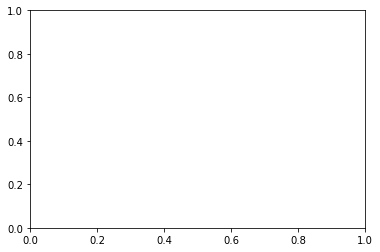

In [338]:
plt.scatter(x,y, color = 'red')
plt.plot(x,y_pred)

In [173]:
data

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
0,30,blue-collar,married,basic.9y,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,0,1.313,5099.1
1,39,services,single,high.school,no,no,no,4,999,0,nonexistent,1.1,93.994,-36.4,0,4.855,5191.0
2,25,services,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,94.465,-41.8,0,4.962,5228.1
3,38,services,married,basic.9y,no,unknown,unknown,3,999,0,nonexistent,1.4,94.465,-41.8,0,4.959,5228.1
4,47,admin.,married,university.degree,no,yes,no,1,999,0,nonexistent,-0.1,93.200,-42.0,0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.958,5228.1
4115,39,admin.,married,high.school,no,yes,no,1,999,0,nonexistent,1.4,93.918,-42.7,0,4.959,5228.1
4116,27,student,single,high.school,no,no,no,2,999,1,failure,-1.8,92.893,-46.2,0,1.354,5099.1
4117,58,admin.,married,high.school,no,no,no,1,999,0,nonexistent,1.4,93.444,-36.1,0,4.966,5228.1


In [177]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder(sparse = False)

In [185]:
for i in ['job','marital','education','default','housing','loan','poutcome']:
    a = pd.DataFrame(one.fit_transform(data[[i]]),columns=one.get_feature_names([i]))
    data1 = data.merge(a.iloc[:,:len(a.columns)-1],right_index=True,left_index=True)


C:\Users\singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_fe

In [227]:
data1

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent
0,2,999,0,-1.8,92.893,-46.2,0,1.313,5099.1,0.0,1.0
1,4,999,0,1.1,93.994,-36.4,0,4.855,5191.0,0.0,1.0
2,1,999,0,1.4,94.465,-41.8,0,4.962,5228.1,0.0,1.0
3,3,999,0,1.4,94.465,-41.8,0,4.959,5228.1,0.0,1.0
4,1,999,0,-0.1,93.200,-42.0,0,4.191,5195.8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3290,4,999,0,1.4,93.444,-36.1,0,4.964,5228.1,0.0,1.0
3291,1,999,0,-3.4,92.649,-30.1,0,0.719,5017.5,0.0,1.0
3292,3,999,0,1.4,93.444,-36.1,0,4.963,5228.1,1.0,0.0
3293,4,999,0,1.4,93.444,-36.1,0,4.968,5228.1,0.0,1.0


In [192]:
data1 = data1.drop(['age','job','marital','education','default','housing','loan','poutcome'], axis = 1)

In [197]:
data1['pred_subs'].value_counts()

0    2297
1     324
Name: pred_subs, dtype: int64

In [ ]:
data

In [199]:
data['pred_subs'].value_counts()

0    2895
1     400
Name: pred_subs, dtype: int64

In [228]:
data_class_0 = data1[data1['pred_subs']==0]
data_class_1 = data1[data1['pred_subs']==1]

In [229]:

data_class_1.shape

(324, 11)

In [232]:
data_class_0.shape

(324, 11)

In [214]:
data[data['pred_subs'] == 1]

,age,job,marital,education,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed
19,50,blue-collar,married,basic.4y,no,no,yes,1,999,0,nonexistent,1.4,93.918,-42.7,1,4.961,5228.1
21,39,technician,divorced,high.school,no,no,no,1,12,2,success,-1.8,93.369,-34.8,1,0.639,5008.7
25,38,technician,married,professional.course,no,yes,no,1,999,0,nonexistent,1.4,93.444,-36.1,1,4.965,5228.1
53,24,technician,married,university.degree,no,yes,yes,2,3,1,success,-3.4,92.379,-29.8,1,0.770,5017.5
59,60,admin.,divorced,professional.course,no,yes,no,1,999,1,failure,-1.1,94.199,-37.5,1,0.886,4963.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4034,74,retired,married,university.degree,no,yes,yes,3,999,0,nonexistent,-2.9,92.201,-31.4,1,0.854,5076.2
4066,81,retired,married,basic.4y,no,yes,no,1,999,2,failure,-1.1,94.601,-49.5,1,1.016,4963.6
4069,60,admin.,married,university.degree,no,yes,no,2,999,0,nonexistent,-1.8,92.893,-46.2,1,1.354,5099.1
4088,47,management,married,university.degree,no,yes,no,1,3,2,success,-3.4,92.379,-29.8,1,0.771,5017.5


In [230]:
data_class_0 = data_class_0.sample(324)

In [233]:
n_df = pd.concat([data_class_0,data_class_1], axis=0)

In [234]:
n_df

,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,pred_subs,euribor3m,nr.employed,poutcome_failure,poutcome_nonexistent
2234,1,999,1,-1.8,92.893,-46.2,0,1.299,5099.1,0.0,1.0
2773,3,999,0,1.4,93.918,-42.7,0,4.957,5228.1,0.0,1.0
2575,2,4,1,-1.1,94.767,-50.8,0,1.035,4963.6,0.0,1.0
2761,1,999,0,-1.8,92.893,-46.2,0,1.270,5099.1,0.0,1.0
199,2,999,0,-0.1,93.200,-42.0,0,4.076,5195.8,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3258,2,999,0,1.4,93.444,-36.1,1,4.968,5228.1,1.0,0.0
3262,2,999,1,-1.8,93.075,-47.1,1,1.410,5099.1,0.0,1.0
3266,2,999,0,1.1,93.994,-36.4,1,4.864,5191.0,0.0,1.0
3270,1,999,0,-1.8,93.075,-47.1,1,1.453,5099.1,0.0,1.0


In [311]:
n_df.columns

Index(['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'pred_subs', 'euribor3m', 'nr.employed',
       'poutcome_failure', 'poutcome_nonexistent'],
      dtype='object')

In [341]:
x2 = n_df[['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_failure', 'poutcome_nonexistent']].values

In [342]:
x2.shape

(648, 10)

In [343]:
#model2
x1 = n_df.drop(['pred_subs'], axis = 1).values
y1= n_df[['pred_subs']].values

In [344]:
x1.shape

(648, 10)

In [345]:
y1.shape

(648, 1)

In [348]:
y_train_pred = reg.predict(X_train)

In [349]:
y_train_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,

In [352]:
from sklearn.tree import DecisionTreeClassifier

In [353]:
dtc = DecisionTreeClassifier()

In [354]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [355]:
Y_pred = reg.predict(X_test)

In [356]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        89
           1       0.73      0.66      0.69        73

    accuracy                           0.73       162
   macro avg       0.73      0.73      0.73       162
weighted avg       0.73      0.73      0.73       162



In [357]:
from sklearn import tree

KeyError: 7

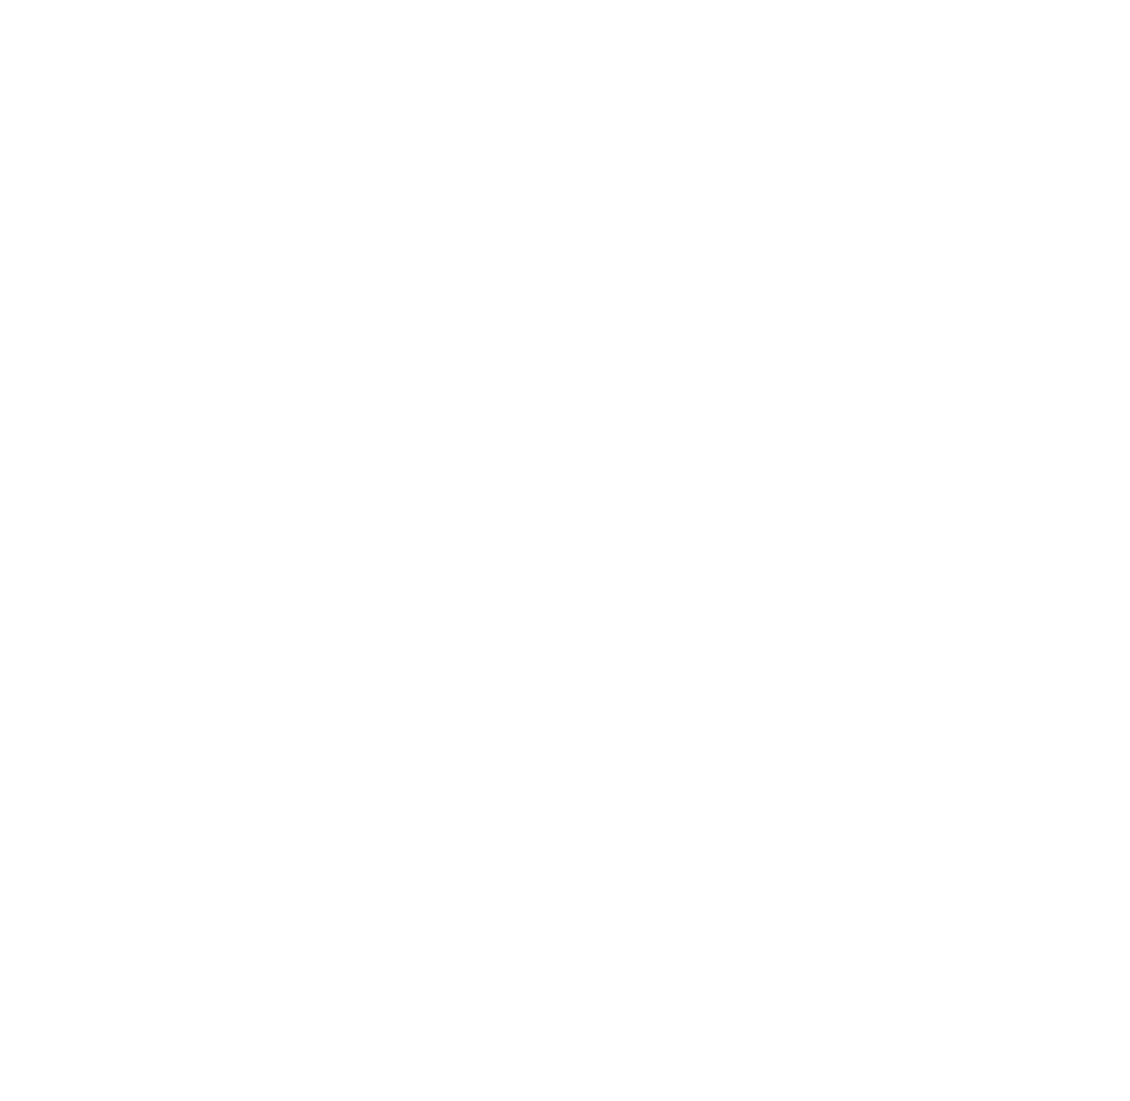

In [358]:
plt.figure(figsize = (20,20))
tree.plot_tree(dtc,feature_names = n_df)